<a href="https://colab.research.google.com/github/Tejaswidarsi/Naive_Bayes/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **1**. Implement Naïve Bayes classifier for following datasets and evaluate the classification performance. Draw the confusion matrix, compute accuracy, error and other measures as applicable.


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

### a. The enjoy sports dataset


In [10]:
data = pd.read_csv("/content/Enjoy sports.csv")
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df.drop(columns=['Decision'])) # Encoding categorical variables
target = df['Decision'].apply(lambda x: 1 if x == 'Yes' else 0) # 1 for 'Yes', 0 for 'No
df.head()

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [22]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)
# Training Naïve Bayes model
model = CategoricalNB()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

Confusion Matrix:
 [[1 0]
 [1 1]]

Accuracy: 0.6666666666666666
Error Rate: 33.33%
Precision: 0.83
Recall: 0.67
F1 Score: 0.67


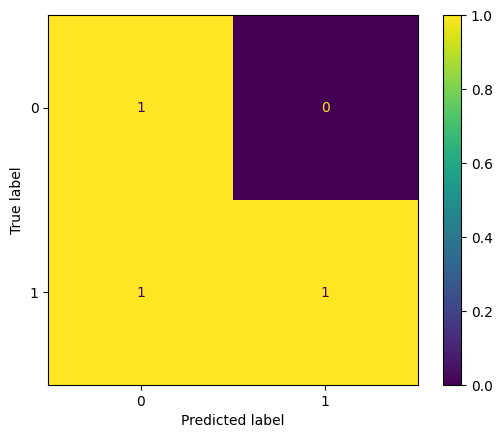

In [23]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print(f'Error Rate: {error_rate * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Display Confusion Matrix
ConfusionMatrixDisplay(conf_matrix).plot()


### b) Iris Dataset


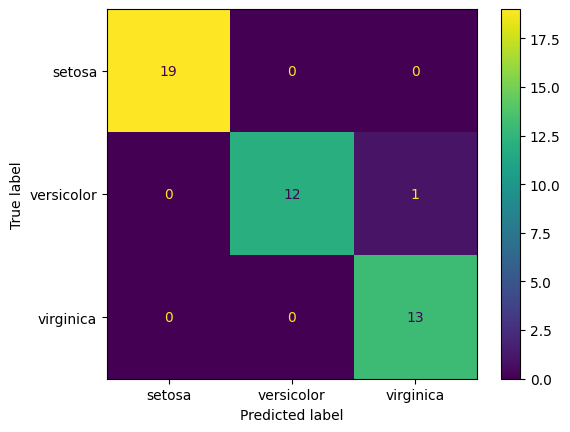

In [17]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

# Display Confusion Matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=target_names).plot()

In [18]:
accuracy = accuracy_score(y_test, y_pred)   #performance metrices
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Confusion Matrix:\n", conf_matrix)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Error Rate: {error_rate * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print("\nClassification Report:\n", classification_rep)

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Accuracy: 97.78%
Error Rate: 2.22%
Precision: 0.98
Recall: 0.98
F1 Score: 0.98

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

